# Supply Chain 01 - Market demand assessment
*This notebook illustrates methods to assess the demand series of a supply chain.* 
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package
import os
from IPython.display import display, HTML #display dataframe


### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from analogistics.data.data_generator_distribution import generateDistributionData

#random generation of distribution data
_, _, _, D_mov = generateDistributionData(num_movements=500)


In [4]:
#print nodes dataframe
display(HTML(D_mov.to_html()))

,LOADING_NODE,LOADING_NODE_DESCRIPTION,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_NODE_DESCRIPTION,DISCHARGING_LATITUDE,DISCHARGING_LONGITUDE,PTA_TO,PTD_TO,ATA_TO,ATD_TO,ITEMCODE,PRODUCT_FAMILY,CLIENT,VEHICLE_CODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,PACKAGE_DESCRIPTION,USER
0,4,NODE_4,41.914115,14.346966,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-01 23:33:45.840878,2020-01-02 00:51:05.012871,19,NODE_19,41.930348,14.789549,2020-01-02 15:12:30.601880,2020-01-02 16:12:30.601880,2020-01-02 15:13:56.053698,2020-01-02 16:19:54.409444,1,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,1.073959,2019-12-28 21:06:35.041877,FEU CONTAINER,USER_3
0,10,NODE_10,41.674054,14.917653,2020-01-02 20:36:35.468792,2020-01-02 21:36:35.468792,2020-01-02 20:28:55.763765,2020-01-02 21:44:22.236205,14,NODE_14,41.546089,14.762535,2020-01-03 04:54:09.561603,2020-01-03 05:54:09.561603,2020-01-03 05:08:11.212927,2020-01-03 05:56:40.633051,0,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,1.463901,2020-01-01 03:26:57.339110,TEU CONTAINER,USER_5
0,0,NODE_0,41.602328,14.961556,2020-01-03 06:24:17.758393,2020-01-03 07:24:17.758393,2020-01-03 06:28:09.673609,2020-01-03 07:19:24.382147,2,NODE_2,41.721208,14.677142,2020-01-03 12:23:42.035700,2020-01-03 13:23:42.035700,2020-01-03 12:55:19.410180,2020-01-03 13:20:32.801184,0,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,7.650365,2019-12-27 10:17:15.966828,FEU CONTAINER,USER_2
0,7,NODE_7,41.717505,14.464295,2020-01-03 14:23:21.586579,2020-01-03 15:23:21.586579,2020-01-03 14:17:48.498351,2020-01-03 15:13:22.111043,6,NODE_6,41.717022,15.041462,2020-01-04 00:21:05.535484,2020-01-04 01:21:05.535484,2020-01-04 00:26:46.770292,2020-01-04 01:19:31.589511,0,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,2.153250,2020-01-03 08:17:26.564757,TEU CONTAINER,USER_1
0,16,NODE_16,41.476142,14.532596,2020-01-04 03:48:22.599169,2020-01-04 04:48:22.599169,2020-01-04 03:46:02.736276,2020-01-04 05:02:04.207249,3,NODE_3,41.913542,14.938827,2020-01-05 01:44:08.002741,2020-01-05 02:44:08.002741,2020-01-05 01:34:08.308680,2020-01-05 02:38:30.382310,1,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,7.958106,2019-12-16 07:06:55.704224,FEU CONTAINER,USER_7
0,6,NODE_6,41.717022,15.041462,2020-01-05 10:43:12.390339,2020-01-05 11:43:12.390339,2020-01-05 10:53:39.135573,2020-01-05 11:22:35.113271,7,NODE_7,41.717505,14.464295,2020-01-06 03:51:59.865001,2020-01-06 04:51:59.865001,2020-01-06 03:51:00.164778,2020-01-06 05:09:42.956157,0,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,4.614380,2020-01-03 18:42:09.067822,TEU CONTAINER,USER_4
0,5,NODE_5,41.573323,14.667694,2020-01-06 06:59:48.192135,2020-01-06 07:59:48.192135,2020-01-06 07:04:43.331310,2020-01-06 08:03:58.906790,10,NODE_10,41.674054,14.917653,2020-01-06 17:35:53.669928,2020-01-06 18:35:53.669928,2020-01-06 17:16:21.586354,2020-01-06 18:23:24.893518,0,PRODUCT_FAMILY 1,CLIENT 2,TRUCK 1,0,8.442300,2019-12-14 23:46:53.282500,TEU CONTAINER,USER_3
0,1,NODE_1,41.459782,14.495904,2020-01-06 20:30:06.620131,2020-01-06 21:30:06.620131,2020-01-06 20:22:46.867909,2020-01-06 21:12:57.103067,12,NODE_12,41.613493,14.270418,2020-01-07 05:42:28.066270,2020-01-07 06:42:28.066270,2020-01-07 05:57:31.244728,2020-01-07 06:16:08.844574,1,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,0,7.464184,2019-12-28 00:20:59.994549,TEU CONTAINER,USER_5
0,2,NODE_2,41.721208,14.677142,2020-01-07 13:04:08.884054,2020-01-07 14:04:08.884054,2020-01-07 12:48:33.405428,2020-01-07 14:21:27.396102,8,NODE_8,41.476163,14.766596,2020-01-07 23:53:28.148835,2020-01-08 00:53:28.148835,2020-01-07 23:48:18.662166,2020-01-08 00:36:41.340937,0,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,4.356977,2020-01-05 17:58:36.637952,TEU CONTAINER,USER_4
0,21,NODE_21,41.654169,14.982685,2020-01-08 01:15:34.305519,2020-01-08 02:15:34.305519,2020-01-08 01:46:05.414537,2020-01-08 02:10:30.754255,21,NODE_21,41.654169,14.982685,2020-01-08 02:15:34.305519,2020-01-08 03:15:34.305519,2020-01-08 02:27:12.452009,2020-01-08 03:19:28.213399,1,PRODUCT_FAMILY 2,CLIENT 2,T

### Create folder hierarchy

In [5]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
root_path = os.path.join(pathResults,f"{string_casestudy}_results")
path_results = os.path.join(root_path,f"P9_demandAssessment")

os.makedirs(root_path, exist_ok=True)
os.makedirs(path_results, exist_ok=True)

### Build the time series

In [6]:
D_time = D_mov.groupby(['TIMESTAMP_IN']).agg({'QUANTITY':['sum'],'TIMESTAMP_IN':['size']}).reset_index()
D_time.columns = ['TIMESTAMP', 'QUANTITY','COUNT']
#print the series
display(HTML(D_time.to_html()))

,TIMESTAMP,QUANTITY,COUNT
0,2019-12-14 23:46:53.282500,8.442300,1
1,2019-12-16 07:06:55.704224,7.958106,1
2,2019-12-27 04:12:53.692954,1.256642,1
3,2019-12-27 10:17:15.966828,7.650365,1
4,2019-12-27 16:44:07.169410,2.070682,1
5,2019-12-28 00:06:24.040350,3.629068,1
6,2019-12-28 00:20:59.994549,7.464184,1
7,2019-12-28 01:30:32.282882,5.192497,1
8,2019-12-28 03:28:15.063957,7.919366,1
9,2019-12-28 19:17:28.468797,4.459578,1


### Plot weekly trend

In [7]:
#summary plot of the time series
from analogistics.supply_chain.P9_workload_prediction.demand_assessment import plotQuantityTrendWeeklyDaily
fig = plotQuantityTrendWeeklyDaily(D_temp=D_time,  
                                   date_field='TIMESTAMP', 
                                   filterVariable=[], 
                                   filterValue=[],  
                                   quantityVariable = 'QUANTITY', 
                                   countVariable = 'COUNT', 
                                   titolo='Quantity and order trend')
fig.savefig(f"{path_results}\\GlobalTrendWeek.png")

C:\Users\aletu\.conda\envs\analogistics3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


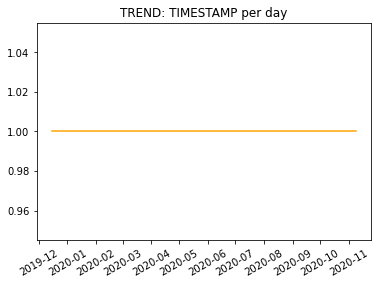

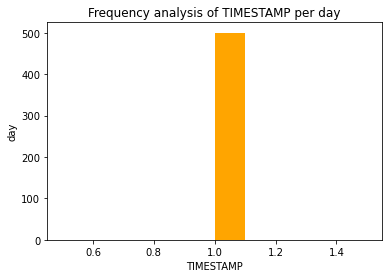

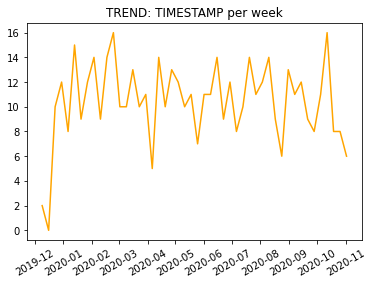

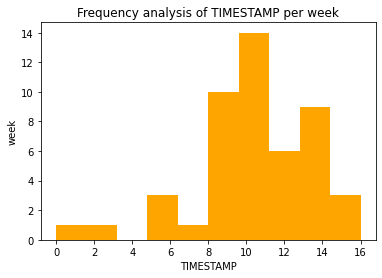

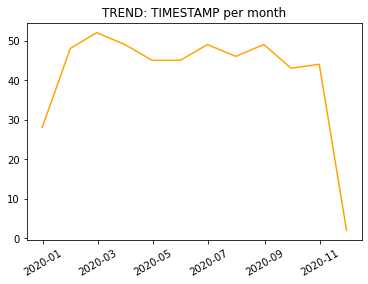

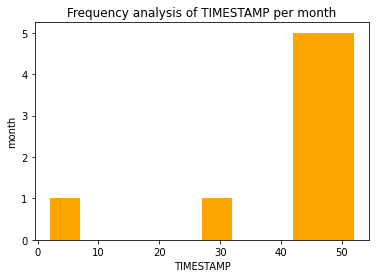

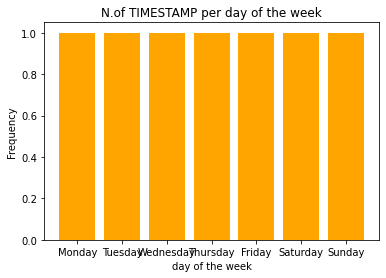

In [8]:
#plot with different level of aggregation
from analogistics.supply_chain.P9_workload_prediction.demand_assessment import bookingStatistics
imageResults, dataframeResults = bookingStatistics(D_mov=D_time,
                                                   capacityField='QUANTITY',
                                                   timeVariable='TIMESTAMP',
                                                   samplingInterval=['day','week','month'])
# salvo figure
for key in imageResults.keys():
    imageResults[key].savefig(path_results+f"\\{key}.png")
    
# salvo dataframe
for key in dataframeResults.keys():
    dataframeResults[key].to_excel(path_results+f"\\{key}.xlsx")

### Analyse correlations of the input dataset

In [9]:
from analogistics.transform import dummyColumns
from analogistics.explore import correlationMatrix

#create dummy dataframe for correlation analysis
D_mov_dummy=dummyColumns(D_mov)


#print the series
display(HTML(D_mov_dummy.to_html()))

,LOADING_NODE,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_LATITUDE,DISCHARGING_LONGITUDE,PTA_TO,PTD_TO,ATA_TO,ATD_TO,ITEMCODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,NODE_0,NODE_1,NODE_10,NODE_11,NODE_12,NODE_13,NODE_14,NODE_15,NODE_16,NODE_17,NODE_18,NODE_19,NODE_2,NODE_20,NODE_21,NODE_22,NODE_23,NODE_24,NODE_3,NODE_4,NODE_5,NODE_6,NODE_7,NODE_8,NODE_9,NODE_0,NODE_1,NODE_10,NODE_11,NODE_12,NODE_13,NODE_14,NODE_15,NODE_16,NODE_17,NODE_18,NODE_19,NODE_2,NODE_20,NODE_21,NODE_22,NODE_23,NODE_24,NODE_3,NODE_4,NODE_5,NODE_6,NODE_7,NODE_8,NODE_9,PRODUCT_FAMILY 1,PRODUCT_FAMILY 2,CLIENT 1,CLIENT 2,TRUCK 1,FEU CONTAINER,TEU CONTAINER,USER_0,USER_1,USER_2,USER_3,USER_4,USER_5,USER_6,USER_7
0,4,41.914115,14.346966,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-01 23:33:45.840878,2020-01-02 00:51:05.012871,19,41.930348,14.789549,2020-01-02 15:12:30.601880,2020-01-02 16:12:30.601880,2020-01-02 15:13:56.053698,2020-01-02 16:19:54.409444,1,0,1.073959,2019-12-28 21:06:35.041877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0
0,10,41.674054,14.917653,2020-01-02 20:36:35.468792,2020-01-02 21:36:35.468792,2020-01-02 20:28:55.763765,2020-01-02 21:44:22.236205,14,41.546089,14.762535,2020-01-03 04:54:09.561603,2020-01-03 05:54:09.561603,2020-01-03 05:08:11.212927,2020-01-03 05:56:40.633051,0,0,1.463901,2020-01-01 03:26:57.339110,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
0,0,41.602328,14.961556,2020-01-03 06:24:17.758393,2020-01-03 07:24:17.758393,2020-01-03 06:28:09.673609,2020-01-03 07:19:24.382147,2,41.721208,14.677142,2020-01-03 12:23:42.035700,2020-01-03 13:23:42.035700,2020-01-03 12:55:19.410180,2020-01-03 13:20:32.801184,0,0,7.650365,2019-12-27 10:17:15.966828,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0
0,7,41.717505,14.464295,2020-01-03 14:23:21.586579,2020-01-03 15:23:21.586579,2020-01-03 14:17:48.498351,2020-01-03 15:13:22.111043,6,41.717022,15.041462,2020-01-04 00:21:05.535484,2020-01-04 01:21:05.535484,2020-01-04 00:26:46.770292,2020-01-04 01:19:31.589511,0,0,2.153250,2020-01-03 08:17:26.564757,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0
0,16,41.476142,14.532596,2020-01-04 03:48:22.599169,2020-01-04 04:48:22.599169,2020-01-04 03:46:02.736276,2020-01-04 05:02:04.207249,3,41.913542,14.938827,2020-01-05 01:44:08.002741,2020-01-05 02:44:08.002741,2020-01-05 01:34:08.308680,2020-01-05 02:38:30.382310,1,0,7.958106,2019-12-16 07:06:55.704224,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1
0,6,41.717022,15.041462,2020-01-05 10:43:12.390339,2020-01-05 11:43:12.390339,2020-01-05 10:53:39.135573,2020-01-05 11:22:35.113271,7,41.717505,14.464295,2020-01-06 03:51:59.865001,2020-01-06 04:51:59.865001,2020-01-06 03:51:00.164778,2020-01-06 05:09:42.956157,0,0,4.614380,2020-01-03 18:42:09.067822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0
0,5,41.573323,14.667694,2020-01-06 06:59:48.192135,2020-01-06 07:59:48.192135,2020-01-06 07:04:43.331310,2020-01-06 08:03:58.906790,10,41.674054,14.917653,2020-01-06 17:35:53.669928,2020-01-06 18:35:53.669928,2020-01-06 17:16:21.586354,2020-01-06 18:23:24.893518,0,0,8.442300,2019-12-14 23:46:53.282500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0
0,1,41.459782,14.495904,2020-01-06 20:30:06.620131,2020-01-06 21:30:06.620131,2020-01-06 20:22:46.867909,2020-01-06 21:12:57.103067,12,41.613493,14.270418,2020-01-07 05:42:28.066270,2020-01-07 06:42:28.066270,2020-01-07 0

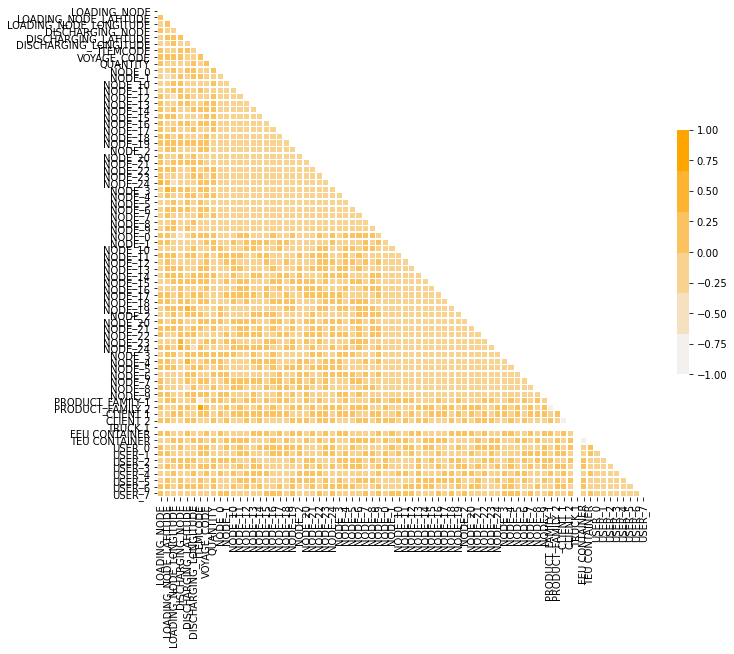

In [10]:
#generate correlation matrix
output_figures = correlationMatrix(D_mov_dummy,annotationCell=False)
# show and save figures
for key in output_figures.keys():
    output_figures[key].savefig(path_results+f"\\{key}.png")
output_figures['CorrelationMatrix']

### Decompose the time series

..\analogistics\supply_chain\P9_workload_prediction\demand_assessment.py:319: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(timeSeries_analysis, model=decompositionModel, freq=frequency)


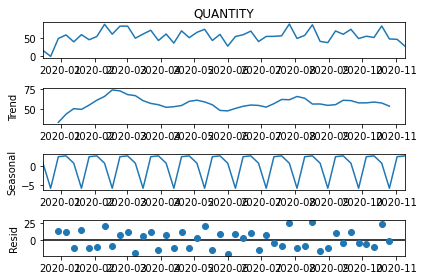

In [11]:
from analogistics.supply_chain.P9_workload_prediction.demand_assessment import decomposeTimeSeries

fig = decomposeTimeSeries(D_time = D_time, 
                                      seriesVariable='QUANTITY', 
                                      samplingInterval='week', 
                                      date_field='TIMESTAMP',  
                                      decompositionModel='additive')



..\analogistics\supply_chain\P9_workload_prediction\demand_assessment.py:319: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(timeSeries_analysis, model=decompositionModel, freq=frequency)


Not enough values to decompose series with sampling interval month
Not enough values to decompose series with sampling interval month


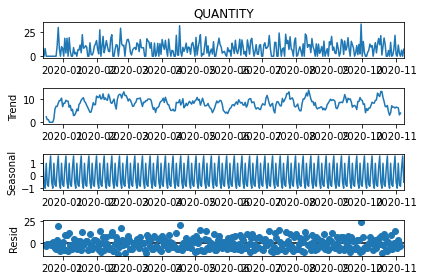

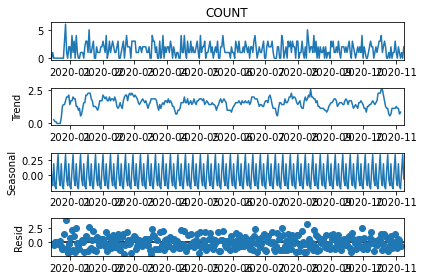

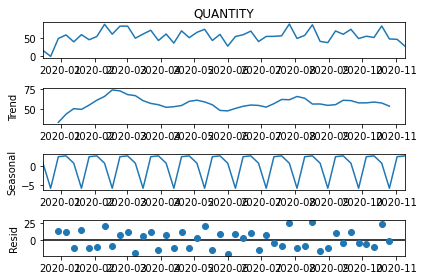

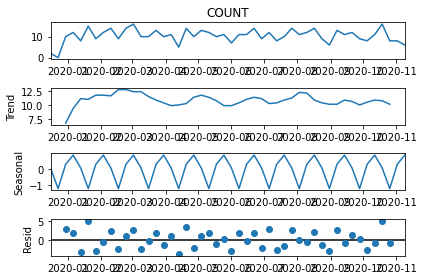

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
#test all the decompositions
variables = {'quantity':'QUANTITY', 'lines':'COUNT'}
samplingIntervals = ['day','week','month']
for samplingInterval in samplingIntervals:
    for var in variables.keys():
        seriesVariable = variables[var]
        
        fig = decomposeTimeSeries(D_time = D_time, 
                                      seriesVariable=seriesVariable, 
                                      samplingInterval=samplingInterval, 
                                      date_field='TIMESTAMP',  
                                      decompositionModel='additive')
        fig.savefig(f"{path_results}\\trend_decompose_{var}_{samplingInterval}.png")

### Fourier analysis

..\analogistics\statistics\time_series.py:517: RuntimeWarning: divide by zero encountered in true_divide
  weeks = 1 / xf
..\analogistics\supply_chain\P9_workload_prediction\demand_assessment.py:358: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(1 / D['Frequency_domain_value'], D['Amplitude'])


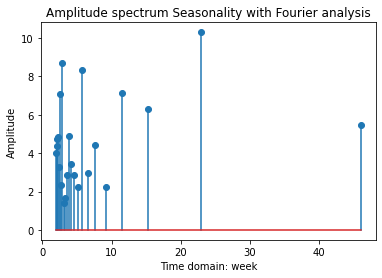

In [13]:
from analogistics.supply_chain.P9_workload_prediction.demand_assessment import seasonalityWithfourier
fig = seasonalityWithfourier(D_time=D_time, 
                             seriesVariable='QUANTITY', 
                             samplingInterval='week', 
                             date_field='TIMESTAMP',
                             titolo='Seasonality with Fourier analysis')




..\analogistics\statistics\time_series.py:517: RuntimeWarning: divide by zero encountered in true_divide
  weeks = 1 / xf
..\analogistics\supply_chain\P9_workload_prediction\demand_assessment.py:358: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(1 / D['Frequency_domain_value'], D['Amplitude'])
..\analogistics\statistics\time_series.py:517: RuntimeWarning: divide by zero encountered in true_divide
  weeks = 1 / xf
..\analogistics\supply_chain\P9_workload_prediction\demand_assessment.py:358: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, 

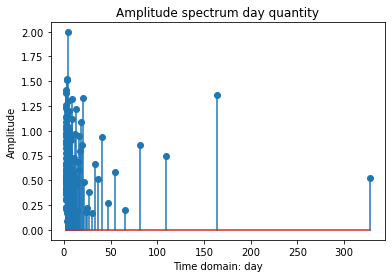

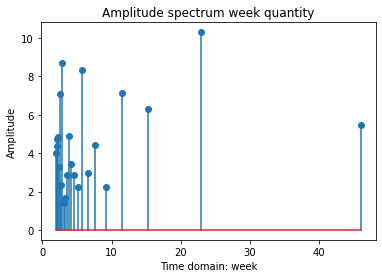

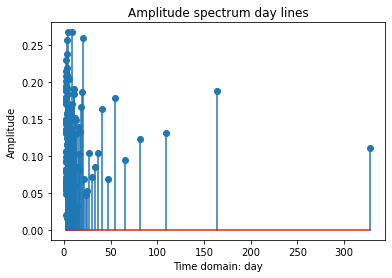

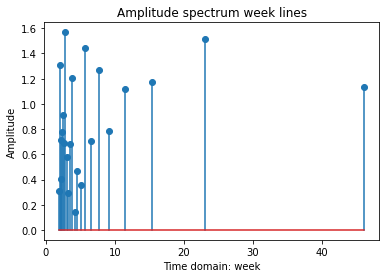

In [14]:
#test all the series
# %% STUDY SEASONALITY USING FOURIER TRANSFORM
for var in variables.keys():
    seriesVariable = variables[var]
    for sampl_int in ['day','week']:
        fig = seasonalityWithfourier(D_time, 
                                     seriesVariable, 
                                     samplingInterval=sampl_int, 
                                     date_field='TIMESTAMP',
                                     titolo=f"{sampl_int} {var}")
        fig.savefig(f"{path_results}\\fourier_decompose_{var}_{sampl_int}.png")